# Forelesning 1: Programmering i kjemi

I denne forelesningen skal vi se på noen enkle anvendelser av programmering i kjemi:
- Utforske periodiske egenskaper ved grunnstoffer.
- Balansere reaksjonslikninger.
- Utforske elektrokjemiske celler.
- Regne på pH i ulike syre-base-systemer.
- Visualisere molekyler.

Det er ikke pensum til eksamen å kunne bruke disse bibliotekene. Dette er ment for å vise noen nyttige muligheter, og for å vise generell problemløsning og programmering (som er pensum til eksamen!).

Menti: https://www.menti.com/jp7xwuafgb

## Jupyter Notebooks til rapportskriving

$\int_0^\pi x^2 dx$

$2H_2 + O_2 \rightarrow 2H_2O$

## Chemlib-bibliotket
Chemlib-biblioteket inneholder mye nyttig informasjon om grunnstoffene våre, og du kan balansere blant annet utføre fortynninger, balansere reaksjoner og tegne og regne på elektrokjemiske celler.

### Atomegenskaper
Her er noen eksempler på hvilke egenskaper vi kan hente opp med chemlib:

|     Kommando             |     Forklaring                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------|
|     AtomicMass           |     Atommasse i g/mol                                                                                              |
|     AtomicNumber         |     Atomnummer                                                                                                     |
|     AtomicRadius         |     Atomradius i pm                                                                                                |
|     BolingPoint          |     Kokepunkt i K                                                                                                  |
|     Density              |     Tetthet i g/cm3                                                                                                |
|     Discoverer           |     Oppdager av grunnstoffet                                                                                       |
|     Electronegativity    |     Pauling-elektronegativitet                                                                                     |
|     Electrons            |     Antallet elektroner                                                                                            |
|     FirstIonization      |     Første ioniseringsenergi i eV                                                                                  |
|     Group                |     Gruppen                                                                                                        |
|     Isotopes             |     Antallet isotoper                                                                                              |
|     MeltingPoint         |     Smeltepunkt i K                                                                                                |
|     Metal                |     Returnerer True hvis stoffet er et   metall.                                                                   |
|     Natural              |     True hvis naturlig forekommende isotoper og False hvis ikke    |
|     Neutrons             |     Antallet nøytroner                                                                                             |
|     Period               |     Perioden                                                                                                       |
|     Phase                |     Fase ved romtemperatur                                                                                         |
|     Protons              |     Antallet protoner                                                                                              |
|     Shells               |     Antallet hovedskall (n)                                                                                        |
|     Type                 |     Kategori i periodesystemet (f.eks.   alkalimetall, halogen)                                                    |

In [1]:
from chemlib import Element

vanadium = Element("V")
print(vanadium.BoilingPoint)

3680


## Støkiometriske beregninger

In [3]:
from chemlib import Compound, Reaction

In [4]:
etanol = Compound("C2H6O")
print(etanol.get_amounts(grams=3))

{'grams': 3, 'molecules': 3.921e+22, 'moles': 0.065}


In [5]:
SO2 = Compound("SO2")
O2 = Compound("O2")
SO3 = Compound("SO3")

reaksjon = Reaction([SO2, O2], [SO3])
reaksjon.balance()
print(reaksjon.formula)
print(reaksjon.is_balanced)

2S₁O₂ + 1O₂ --> 2S₁O₃
True


## Elektrokjemi

{'Cell': 'Cd | Cd2+ || Ag+ | Ag', 'Anode': 'Cd', 'Cathode': 'Ag', 'Cell Potential': 1.203}


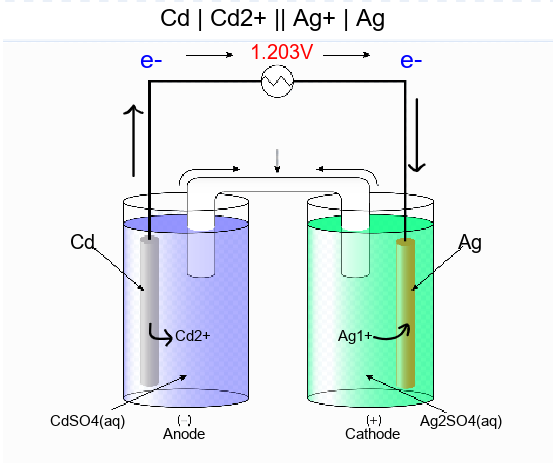

In [6]:
from chemlib import Galvanic_Cell

celle = Galvanic_Cell("Cd", "Ag")
print(celle.properties)
celle.diagram

## Mendeleev-biblioteket
Dette biblioteket inneholder kun muligheter til å hente grunnstoffegenskaper, men har noen ekstra nyttige funksjoner som chemlib ikke har.

In [7]:
from mendeleev import element

krom = element(24)

print(krom.electronegativity())

1.66


En ting som er svært praktisk med mendeleev-biblioteket, er at vi kan hente grunnstoffer ved hjelp av atomnummer istedenfor symbol. Det gjør at vi lettere kan iterere over grunnstoffer i en løkke, f.eks. slik:

In [8]:
for i in range(1,119):
    grunnstoff = element(i)
    print(grunnstoff.name,": ", grunnstoff.electronegativity())

Hydrogen :  2.2
Helium :  None
Lithium :  0.98
Beryllium :  1.57
Boron :  2.04
Carbon :  2.55
Nitrogen :  3.04
Oxygen :  3.44
Fluorine :  3.98
Neon :  None
Sodium :  0.93
Magnesium :  1.31
Aluminum :  1.61
Silicon :  1.9
Phosphorus :  2.19
Sulfur :  2.58
Chlorine :  3.16
Argon :  None
Potassium :  0.82
Calcium :  1.0
Scandium :  1.36
Titanium :  1.54
Vanadium :  1.63
Chromium :  1.66
Manganese :  1.55
Iron :  1.83
Cobalt :  1.88
Nickel :  1.91
Copper :  1.9
Zinc :  1.65
Gallium :  1.81
Germanium :  2.01
Arsenic :  2.18
Selenium :  2.55
Bromine :  2.96
Krypton :  None
Rubidium :  0.82
Strontium :  0.95
Yttrium :  1.22
Zirconium :  1.33
Niobium :  1.6
Molybdenum :  2.16
Technetium :  2.1
Ruthenium :  2.2
Rhodium :  2.28
Palladium :  2.2
Silver :  1.93
Cadmium :  1.69
Indium :  1.78
Tin :  1.96
Antimony :  2.05
Tellurium :  2.1
Iodine :  2.66
Xenon :  2.6
Cesium :  0.79
Barium :  0.89
Lanthanum :  1.1
Cerium :  1.12
Praseodymium :  1.13
Neodymium :  1.14
Promethium :  None
Samarium :  1.1

- Hva gjør programmet ovenfor?
- Programmet nedenfor skal plotte trendene i elektronegativitet for alle grunnstoffer. Fyll inn det som mangler.

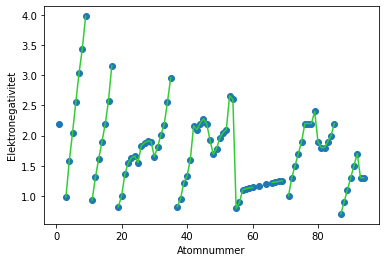

In [9]:
import matplotlib.pyplot as plt
from mendeleev import element

atomnummer = []
elektronegativitet = []

for i in range(1,119):
    grunnstoff = element(i)
    atomnummer.append(grunnstoff.atomic_number)
    elektronegativitet.append(grunnstoff.electronegativity())
    
plt.plot(atomnummer, elektronegativitet, linestyle=" ", marker="o")
plt.plot(atomnummer, elektronegativitet, color = "limegreen")
plt.xlabel("Atomnummer")
plt.ylabel("Elektronegativitet")
plt.show()

## Syrer og baser

Vi bruker et nyttig bibliotek som heter pHcalc til å regne på pH i syrer og baser.

In [5]:
from pHcalc.pHcalc import Acid

FileNotFoundError: Could not find module 'C:\Users\andreadh\Anaconda3\lib\site-packages\scipy\.libs\libbanded5x.UGR6EUQPIWHQH7SL62IWIXB5545VDNQZ.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [3]:
from pHcalc.pHcalc import Acid, Neutral, System

Na = Neutral(charge=1, conc=1)
sol = System(Na)
sol.pHsolve()
print(sol.ph)

hf = Acid(Ka = 6.8E-4, charge = 0, conc = 0.1)
k = Neutral(charge=1, conc=0.1)
sol2 = System(hf, K)
sol2.pHsolve()
print(sol2.ph)

FileNotFoundError: Could not find module 'C:\Users\andreadh\Anaconda3\lib\site-packages\scipy\.libs\libbanded5x.UGR6EUQPIWHQH7SL62IWIXB5545VDNQZ.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

AttributeError: module 'pHcalc' has no attribute 'Acid'

## Visualisering av molekyler

In [ ]:
print(x)

__Oppgaver__:
1.	Lag et program som skriver ut eller plotter kokepunktet til alle halogenene. Beskriv og forklar trenden i kokepunkt.
2.	Plott atomradius som funksjon av atomnummer for alle grunnstoffer i periodesystemet og forklar det du ser. Plott deretter kun for grunnstoff 19–36 og forklar hva du ser.
3. Lag en 3D-modell av benzosyre og proteinet keratin (6EC0 i PDB). 